In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
messages=pd.read_csv('C:\\Users\\adila\\Downloads\\spam classifier nlp\\spam.csv')

UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 135-136: invalid continuation byte

In [3]:
messages=pd.read_csv('C:\\Users\\adila\\Downloads\\spam classifier nlp\\spam.csv',encoding="ISO-8859-1", engine='python')

In [4]:
messages

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [5]:
messages=messages.drop(labels=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)
messages

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [6]:
messages=messages.rename(columns={'v1':'label','v2':'message'})
messages

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [7]:
messages.isna().sum()

label      0
message    0
dtype: int64

In [8]:
messages.nunique()

label         2
message    5169
dtype: int64

In [9]:
messages['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

([<matplotlib.patches.Wedge at 0x1a89d76e490>,
 [Text(-1.368915679356207, 0.6132453528668067, 'ham'),
  Text(1.1863935638950363, -0.5314793613569908, 'spam')],
 [Text(-0.9126104529041379, 0.40883023524453777, '86.6%'),
  Text(0.7300883470123298, -0.32706422237353283, '13.4%')])

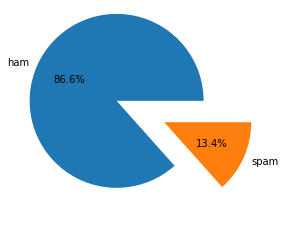

In [10]:
plt.pie(messages['label'].value_counts(),explode=[0.4,0.2],autopct='%1.1f%%',labels=['ham','spam'])

In [11]:
import nltk
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import re

In [12]:
pc=PorterStemmer()
wordnet=WordNetLemmatizer()

In [14]:
corpus = []
for i in range(len(messages)):
    review=re.sub('[^a-zA-z]',' ',messages['message'][i])
    review=review.lower()
    review=review.split()
    review=[pc.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review=' '.join(review)
    corpus.append(review)

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [16]:
cv=CountVectorizer()
#cv=CountVectorizer(max_features=2500)

tfcv=TfidfVectorizer()
#tfcv=TfidfVectorizer(max_features=2500)

In [17]:
X=cv.fit_transform(corpus).toarray()
X1=tfcv.fit_transform(corpus).toarray()

In [87]:
X.shape# 7000 features have form

(5572, 7048)

In [18]:
y=pd.get_dummies(messages['label'])

In [19]:
y

,ham,spam
0,1,0
1,1,0
2,0,1
3,1,0
4,1,0
...,...,...
5567,0,1
5568,1,0
5569,1,0
5570,1,0


In [20]:
y=y.drop(labels='ham',axis=1)
y

,spam
0,0
1,0
2,1
3,0
4,0
...,...
5567,1
5568,0
5569,0
5570,0


In [37]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix,accuracy_score

In [26]:
nb=MultinomialNB()

In [27]:
nb1=MultinomialNB()

In [43]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)

In [55]:
x1_train,x1_test,y1_train,y1_test=train_test_split(X1,y,test_size=0.20,random_state=0)

In [44]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((4457, 6251), (4457, 1), (1115, 6251), (1115, 1))

In [61]:
# With Count Vectorizer

In [45]:
nb.fit(x_train,y_train)

C:\Users\adila\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


MultinomialNB()

In [46]:
nb.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [47]:
confusion_matrix(y_test,nb.predict(x_test))

array([[932,  17],
       [  7, 159]], dtype=int64)

In [48]:
accuracy=(932+159)/(932+159+17+7)
accuracy

0.97847533632287

In [49]:
accuracy_score(y_test,nb.predict(x_test))

0.97847533632287

In [62]:
# With TF-IDF Vectorizer

In [56]:
nb1.fit(x1_train,y1_train)

C:\Users\adila\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


MultinomialNB()

In [57]:
nb1.predict(x1_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [58]:
confusion_matrix(y1_test,nb1.predict(x1_test))

array([[949,   0],
       [ 48, 118]], dtype=int64)

In [59]:
accuracy=(949+118)/(949+118+48+0)
accuracy

0.95695067264574

In [60]:
accuracy_score(y1_test,nb1.predict(x1_test))

0.95695067264574

# Now using Lemmatization

In [63]:
corpus = []
for i in range(len(messages)):
    review=re.sub('[^a-zA-z]',' ',messages['message'][i])
    review=review.lower()
    review=review.split()
    review=[wordnet.lemmatize(word) for word in review if not word in set(stopwords.words('english'))]
    review=' '.join(review)
    corpus.append(review)

In [88]:
#cv=CountVectorizer()
cv=CountVectorizer(max_features=5000)

#tfcv=TfidfVectorizer()
tfcv=TfidfVectorizer(max_features=5000)

In [89]:
X=cv.fit_transform(corpus).toarray()
X1=tfcv.fit_transform(corpus).toarray()

In [90]:
X.shape,X1.shape # 7000 features have form

((5572, 5000), (5572, 5000))

In [91]:
y=pd.get_dummies(messages['label'])
y

,ham,spam
0,1,0
1,1,0
2,0,1
3,1,0
4,1,0
...,...,...
5567,0,1
5568,1,0
5569,1,0
5570,1,0


In [92]:
y=y.drop(labels='ham',axis=1)
y

,spam
0,0
1,0
2,1
3,0
4,0
...,...
5567,1
5568,0
5569,0
5570,0


In [93]:
nb=MultinomialNB()  #for Count Vectorizer
nb1=MultinomialNB() #for TF-IDF Vectorizer

In [94]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)

In [95]:
x1_train,x1_test,y1_train,y1_test=train_test_split(X1,y,test_size=0.20,random_state=0)

In [96]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((4457, 5000), (4457, 1), (1115, 5000), (1115, 1))

In [97]:
x1_train.shape,y1_train.shape,x1_test.shape,y1_test.shape

((4457, 5000), (4457, 1), (1115, 5000), (1115, 1))

In [98]:
# With Count Vectorizer

In [99]:
nb.fit(x_train,y_train)

C:\Users\adila\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


MultinomialNB()

In [100]:
nb.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [101]:
confusion_matrix(y_test,nb.predict(x_test))

array([[937,  12],
       [  6, 160]], dtype=int64)

In [112]:
accuracy=(937+160)/(937+160+12+6)
accuracy

0.9838565022421525

In [113]:
accuracy_score(y_test,nb.predict(x_test))

0.9838565022421525

In [104]:
# With TF-IDF Vectorizer

In [105]:
nb1.fit(x1_train,y1_train)

C:\Users\adila\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


MultinomialNB()

In [106]:
nb1.predict(x1_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [107]:
confusion_matrix(y1_test,nb1.predict(x1_test))

array([[949,   0],
       [ 36, 130]], dtype=int64)

In [111]:
accuracy=(949+130)/(949+130+36+0)
accuracy

0.967713004484305

In [109]:
accuracy_score(y1_test,nb1.predict(x1_test))

0.967713004484305

In [110]:
# In lemmatization (both with Count Vectorizer and TF-IDF Vetcorizer) accuracy have been slightly increased.